# Practice 7 - kNN, Decision Tree, SVM

We will work here on a data set taken from Scikit-Learn about the characteristics of malignant and benign breast tumors to prevent the risk of cancer.

## Preparation of the data set

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn 

**Loading the data set from Scikit-Learn**

In [2]:
from sklearn.datasets import load_breast_cancer
data_all = load_breast_cancer()

**Checking the keys of the dictionary loaded**

In [3]:
data_all.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

**Getting a description of the data set**

In [4]:
print(data_all.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**Preparing the data frame of all features**

In [5]:
data_all.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
features = pd.DataFrame(data=data_all.data, columns=data_all.feature_names)
features.sample(n=8, random_state=1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.3219,0.11080,0.2827,0.09208
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.17860,0.41660,0.5006,0.20880,0.3900,0.11790
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,13.74,19.93,88.81,585.4,0.14830,0.20680,0.2241,0.10560,0.3380,0.09584
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.3538,0.15710,0.3206,0.06938
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.11480,0.09866,0.1547,0.06575,0.3233,0.06165
132,16.16,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,19.47,31.68,129.70,1175.0,0.13950,0.30550,0.2992,0.13120,0.3480,0.07619
161,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,...,22.03,17.81,146.60,1495.0,0.11240,0.20160,0.2264,0.17770,0.2443,0.06251
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.19630,0.2535,0.09181,0.2369,0.06558


In [7]:
features.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Preparing the data frame of the target**

In [8]:
target = pd.DataFrame(data=data_all.target, columns=['tumor type'])
target.sample(n=8, random_state=1)

,tumor type
421,1
47,0
292,1
186,0
414,0
132,0
161,0
197,0


**To make the target encoding more obvious (we want to predict the risk of cancer), we invert the encoding values so that now 0 codes benign and 1 codes malignant**

In [9]:
target = target.replace({0:1, 1:0})
target.sample(n=8, random_state=1)

,tumor type
421,0
47,1
292,0
186,1
414,1
132,1
161,1
197,1


## Subject

We consider two predictors: mean radius and mean texture.
* Train a k-NN with k=5 and plot the decision areas based on that model.
* Explore different values of k to determine an optimal value.
* Train a k-NN with the optimal k you found.
* Train a Decision Tree and plot the decision areas based on that model.
* What would be an optimal value for the depth of the Decision Tree?  
*Hint*: you can use parameter max_depth of DecisionTreeClassifier.
* Train a Random Forest and plot the decision areas based on that model.  
*Bonus:* you can tune the hyperparameters of your Random Forest model (refer to the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to see what parameters can be tuned). If you want to facilitate the optimization of many hyperparameters at once, you can use the [Grid Search method](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). 
* Train a SVM (with linear kernel) and plot the decision areas based on that model.
* Compare the performance between all models. Choose a comparison metric and explain your choice.
* Pick the best model, explain your choice, and compute its performance on unseen test data (unseen means your model was never trained or tuned on it).

In [10]:
# prepare data for splitting
X = features[['mean radius', 'mean texture']].values
# ravel() to flatten the array
y = target.values.ravel()

In [11]:
# train test split
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(455, 2) (455,)
(114, 2) (114,)


In [12]:
# training a k-NN classifier
from sklearn.neighbors import KNeighborsClassifier


def train_knn(n_neighbors=5):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric='euclidean', n_jobs=-1)
    knn.fit(X_train, y_train)
    return knn

In [13]:
knn = train_knn(n_neighbors=5)

## Plotting the decision areas based on the training data


In [14]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')
    
    plt.xlabel('mean radius')
    plt.ylabel('mean texture')
    plt.title(str(classifier))
    plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


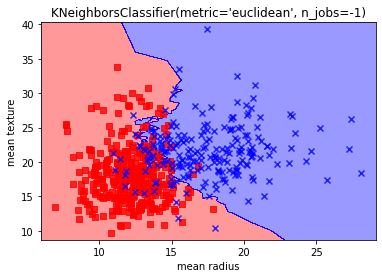

In [15]:
plot_decision_regions(X, y, classifier=knn)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


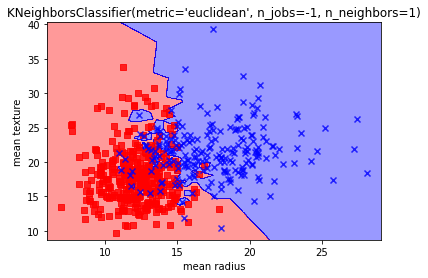

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


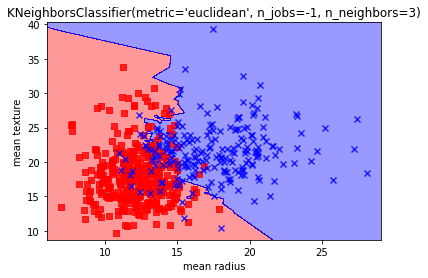

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


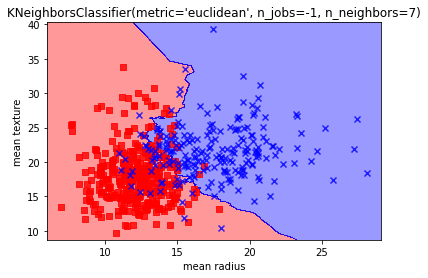

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


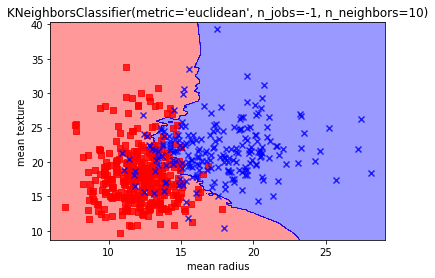

In [16]:
# Explore different values of k to determine an optimal value
k_list = [1, 3, 7, 10]

for i in k_list:
    knn = train_knn(n_neighbors=i)
    plot_decision_regions(X, y, classifier=knn)

#### It seems like better to go with k=7 due to fitting the dataset better

In [17]:
# train knn with k=7
knn = train_knn(n_neighbors=7)

#### Training a Decision Tree

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


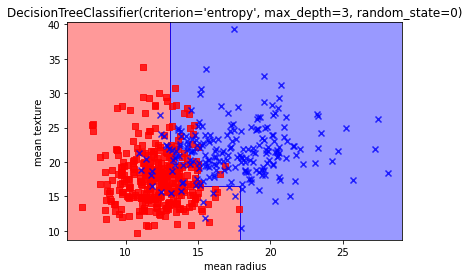

In [18]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth=3)
dt.fit(X_train, y_train)
plot_decision_regions(X, y, classifier=dt)

#### Seems like max_depth=3 is a good choice for the DecisionTree since it slightly starts to overfit the data after the value of 3

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


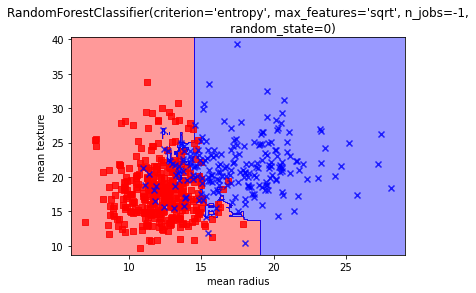

In [19]:
# Train a Random Forest and plot the decision areas based on that model.  
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0, n_jobs=-1, max_features='sqrt')
rf.fit(X_train, y_train)
plot_decision_regions(X, y, classifier=rf)

In [20]:
from sklearn.model_selection import GridSearchCV


param_grid = {'n_estimators': [10, 100, 200, 300, 400, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'criterion': ['gini', 'entropy']}
rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
rf_cv.fit(X_train, y_train)
print(rf_cv.best_params_)

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 100}


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


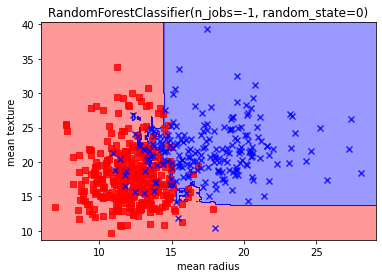

In [21]:
rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=0, n_jobs=-1, max_features='auto')
rf.fit(X_train, y_train)
plot_decision_regions(X, y, classifier=rf)

#### Desicion regions are clearer after finding the optimal values with GridSearchCV

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


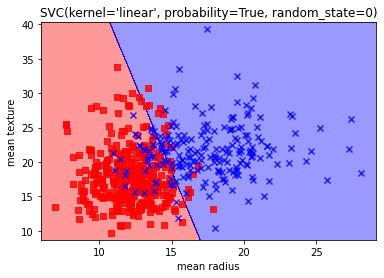

In [22]:
# Train a SVM (with linear kernel) and plot the decision areas based on that model.
from sklearn.svm import SVC


svm = SVC(kernel='linear', random_state=0, probability=True)
svm.fit(X_train, y_train)
plot_decision_regions(X, y, classifier=svm)

### Making Predictions

In [23]:
model_list = [knn, dt, rf, svm]

In [24]:
knn_dict, dt_dict, rf_dict, svm_dict = {}, {}, {}, {}
class_dicts = [knn_dict, dt_dict, rf_dict, svm_dict]

# keep all the related data in dicts
for i in range(len(class_dicts)):
    class_dicts[i]['classifier'] = model_list[i]
    class_dicts[i]['y_proba'] = class_dicts[i]['classifier'].predict_proba(X_test)
    class_dicts[i]['y_proba_positive'] = class_dicts[i]['y_proba'][:,1]
    class_dicts[i]['y_pred'] = class_dicts[i]['classifier'].predict(X_test)

### Performance assesments

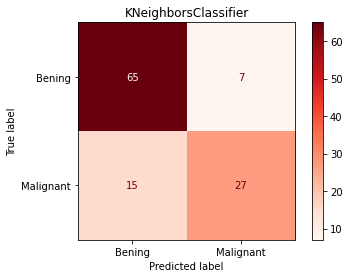

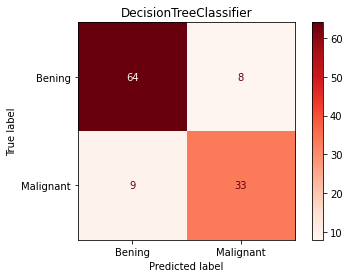

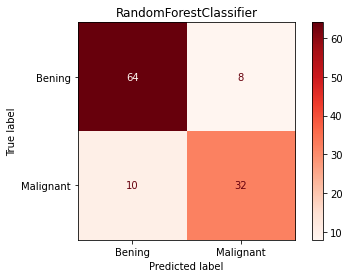

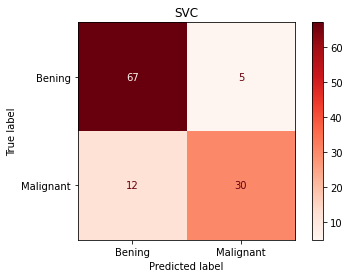

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


# confusion matrix for each model
for i in class_dicts:
    cm = confusion_matrix(y_test, i['y_pred'])
    _ = ConfusionMatrixDisplay(cm, display_labels=["Bening", "Malignant"]).plot(cmap="Reds")
    plt.title(i['classifier'].__class__.__name__)

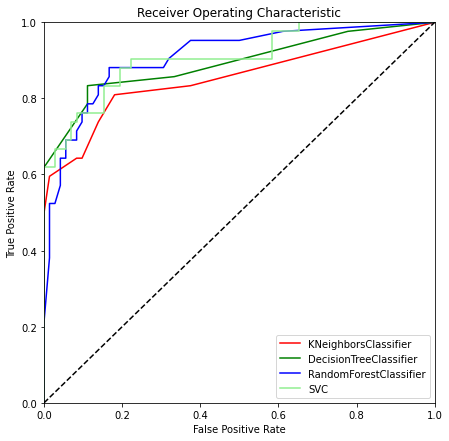

In [26]:
from sklearn.metrics import roc_curve


plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic')
colors = ['red', 'green', 'blue', 'lightgreen']

# plot ROC curve of each model
for i in range(len(class_dicts)):
    fpr, tpr, thresholds = roc_curve(y_test, class_dicts[i]['y_proba_positive'])
    plt.plot(fpr, tpr, c=colors[i], label=class_dicts[i]['classifier'].__class__.__name__)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [27]:
# Accuracy, precision, recall
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


def compute_metrics(classifier_data, y_test):
    model_name = classifier_data['classifier'].__class__.__name__
    
    accuracy = round(accuracy_score(y_test, classifier_data['y_pred']), 2)
    precision = round(precision_score(y_test, classifier_data['y_pred']),2)
    recall = round(recall_score(y_test, classifier_data['y_pred']),2)
    f1 = round(f1_score(y_test, classifier_data['y_pred']), 2)
    auc = round(roc_auc_score(y_test, classifier_data['y_proba_positive']), 2)
    
    print('Model: ' + model_name)
    print('-' * 80)
    print('Accuracy (proportion of correct predictions) is ' + str(accuracy))
    print('Precision (proportion of true purchases among purchase predictions) is ' + str(precision))
    print('Recall (proportion of true purchases that are correctly predicted) is ' + str(recall))
    print('F1 score (combination of precision and recall) is ' + str(f1))
    print('Area Under the Curve (AUC) is ' + str(auc))
    return pd.DataFrame({
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 score': f1,
        'AUC score': auc
    }, index=[model_name])

In [28]:
# compute metrics for each model
metrics_df = pd.concat([compute_metrics(i, y_test) for i in class_dicts])
metrics_df

Model: KNeighborsClassifier
--------------------------------------------------------------------------------
Accuracy (proportion of correct predictions) is 0.81
Precision (proportion of true purchases among purchase predictions) is 0.79
Recall (proportion of true purchases that are correctly predicted) is 0.64
F1 score (combination of precision and recall) is 0.71
Area Under the Curve (AUC) is 0.85
Model: DecisionTreeClassifier
--------------------------------------------------------------------------------
Accuracy (proportion of correct predictions) is 0.85
Precision (proportion of true purchases among purchase predictions) is 0.8
Recall (proportion of true purchases that are correctly predicted) is 0.79
F1 score (combination of precision and recall) is 0.8
Area Under the Curve (AUC) is 0.89
Model: RandomForestClassifier
--------------------------------------------------------------------------------
Accuracy (proportion of correct predictions) is 0.84
Precision (proportion of true 

,Accuracy,Precision,Recall,F1 score,AUC score
KNeighborsClassifier,0.81,0.79,0.64,0.71,0.85
DecisionTreeClassifier,0.85,0.80,0.79,0.80,0.89
RandomForestClassifier,0.84,0.80,0.76,0.78,0.91
SVC,0.85,0.86,0.71,0.78,0.91


## Conclusion <br>
##### KNN and DecisionTree doesn't seem as good options for this data set most of the cases. They were in the bottom both for accuracy, f1 score and on the confusion matrix. On the other hand, while SVM seems like a nice fit for this dataset, it was worse than RandomForest, again on the confusion matrix. They both gave the same amount of false negatives and true negatives in total, but the negative rates were more spreaded for the SVM (5, 12) while the opposite for RandomForest (8, 10). The more spreaded values point that the difference may be higher between negative rates on different datasets. That's the reason why I would go with RandomForest even the SVM seems better on accuracy and precision. Also, SVM is worse on predicting malignant type of tumors which can be more dangerous for people than not being able to detect bening tumors in a better way.